In [ ]:
!pip install statannot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.ticker as ticker
plt.rcParams['axes.unicode_minus'] = False
import random as random
import seaborn as sns
sns.set()
from matplotlib import style
style.use('ggplot')
%matplotlib inline
from statannot import add_stat_annotation

In [2]:
o5_time_SameBMI = pd.read_csv("quadro_matched.csv")
len(np.unique(o5_time_SameBMI['pid']))

2816

# Box plot function

In [77]:
def plotbox_pvals(lab_test,time_data):
    order = ['normless', 'overless', 'normgrow', 'overgrow']
    time_data = time_data.rename(columns={"cbc_pla":"Platelet"})
    time_data = time_data.rename(columns={"state_number":"State"})
    ax = sns.boxplot(x="State", y=lab_test, data=time_data, order=order, palette="tab10")
    add_stat_annotation(ax, data=time_data, x="State", y=lab_test, 
                        box_pairs=[('normless', 'overless'), ('normless', 'normgrow'), ('normless', 'overgrow'),\
                                   ('overless', 'normgrow'),('overless', 'overgrow'),('normgrow', 'overgrow')],
                        test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

overless v.s. normless: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.037e+04
normgrow v.s. overless: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.846e-02 U_stat=1.453e+04
overgrow v.s. normgrow: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.871e+04
normgrow v.s. normless: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.856e-01 U_stat=1.432e+04
overgrow v.s. overless: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.767e-03 U_stat=1.812e+04
overgrow v.s. normless: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.178e-02 U_stat=1.787e+04


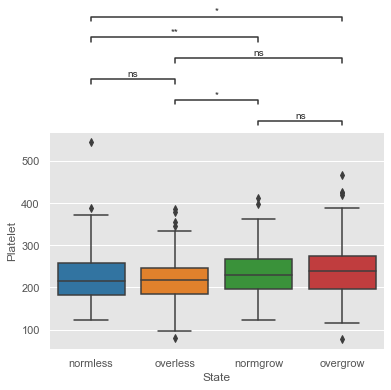

In [80]:
time10 = o5_time_SameBMI[o5_time_SameBMI["time_lapse"]==10]
plotbox_pvals('Platelet',time10)

# F test

In [46]:
import numpy as np
import scipy

#define F-test function
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x)/np.var(y) #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator 
    p = 1- scipy.stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    return f, p

In [64]:
order = ['normless', 'overless', 'normgrow', 'overgrow']
combos = []
for i in itertools.combinations(order, 2):
    combos.append(i)
    
def f_labtests(test):
    for i in range(len(combos)):
        x = o5_time_SameBMI[o5_time_SameBMI["state_number"]==combos[i][0]][test].dropna()
        y = o5_time_SameBMI[o5_time_SameBMI["state_number"]==combos[i][1]][test].dropna()
        print(combos[i]), print(test)
        print(f_test(x,y))

# Group count function

In [41]:
def group_count(test_list):
    dct = {}
    order = ['normgrow', 'overgrow', 'normless', 'overless']
    name = ['Increase+Normal','Increase+Overweight','Decrease+Normal','Decrease+Overweight']
    for i in range(4):
            dct[name[i]] = [] 

    datas = test_list

    for data in datas:
        count = 0
        for i in order:
            group = data[data['state_number']==i]
            dct[name[count]].append(str(len(group['pid'].unique())))
            count += 1


    df = pd.DataFrame.from_dict(dct, orient='index')
    df = df.transpose()
    df.rename(index = {0:"Year 0",
                   1:"Year 5",
                   2:"Year 10"},
                   inplace = True)
    return df

In [43]:
cho_0= cho[cho["time_lapse"]==0]
cho_5= cho[cho["time_lapse"]==5]
cho_10= cho[cho["time_lapse"]==10]

In [44]:
group_count([cho_0,cho_5,cho_10])

,Increase+Normal,Increase+Overweight,Decrease+Normal,Decrease+Overweight
Year 0,704,704,703,704
Year 5,419,392,413,421
Year 10,171,204,144,144
